# Explore if we can weight loss by sim_energy

problems: Many things have little to no sim_energy

Likely will have to do a:
$$(1+\alpha*\text{SIM_ENERGY})*MSE$$

In [44]:

def Sim_AE_MSE(data, pred,sims, alpha = 1):
    return torch.mean((sims*alpha+1)*(torch.sum((data-pred)**2,dim=1)))



In [41]:
alpha = 1 
sims * alpha + 

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [22]:
import os
import sys
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt
from Naive_DAE import Naive_DAE,Dropout_DAE
import AE_Stats
from load_data_fn import load_data, load_data_no_filter

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset
import importlib


In [23]:
dt = load_data_no_filter(1)

In [45]:
num_epochs = 100
lr = 0.0025
loss = Sim_AE_MSE

In [25]:
sims = dt[:,-4]

In [26]:
dt_loc= torch.clone(dt)

In [27]:
size_train =100000
size_test = 50000
train_loc = dt_loc[0:size_train]
test_loc = dt_loc[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=100,
    shuffle=False
)

test_loc_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=100,
    shuffle=False
)

train = dt[0:size_train]
test = dt[-size_test:,0:48]
test_sims = dt[-size_test:,-4]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=100,
    shuffle=False
)

test_dl_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=100,
    shuffle=False
)

In [49]:
train_sims


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.2251, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

MSE 6999.91015625
Median 567.9188842773438
Standard Devitaion 31499.931640625
Average % Error 167340851200.0


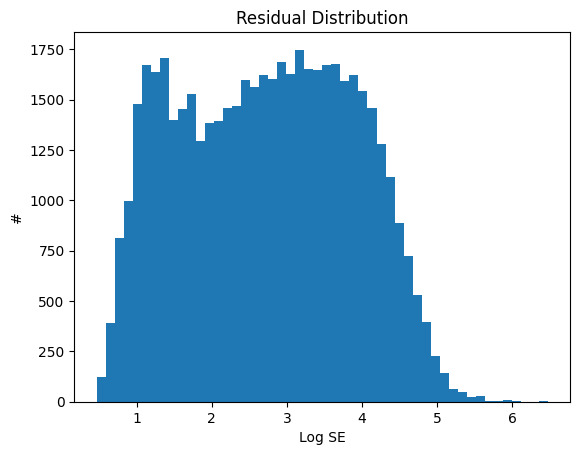

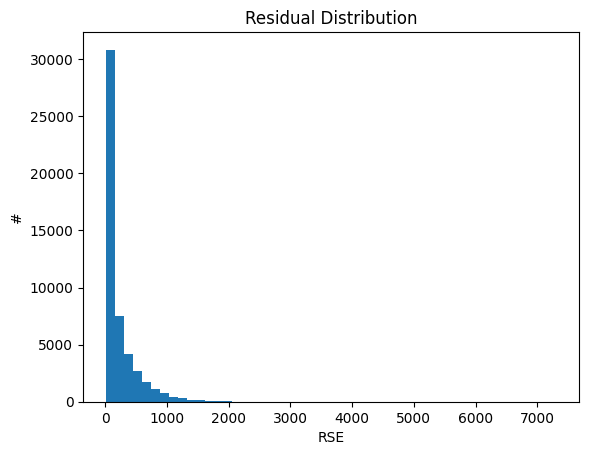

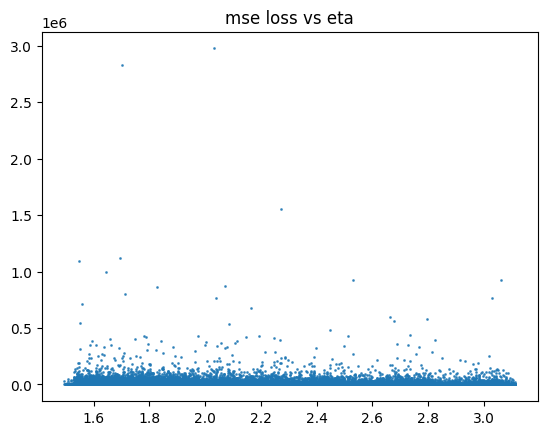

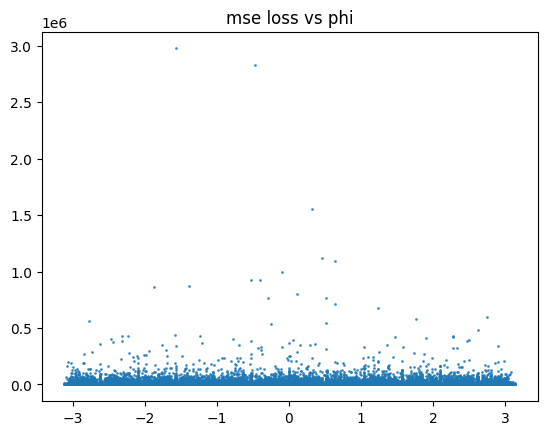

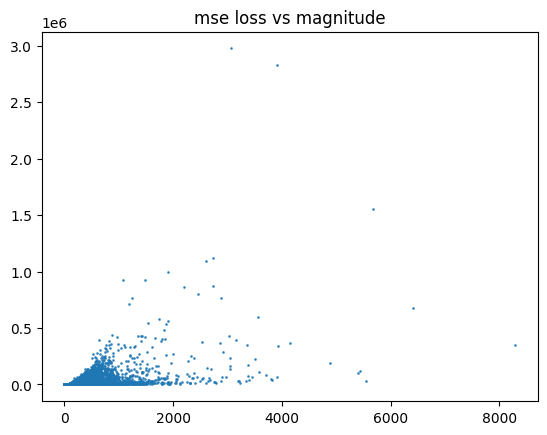

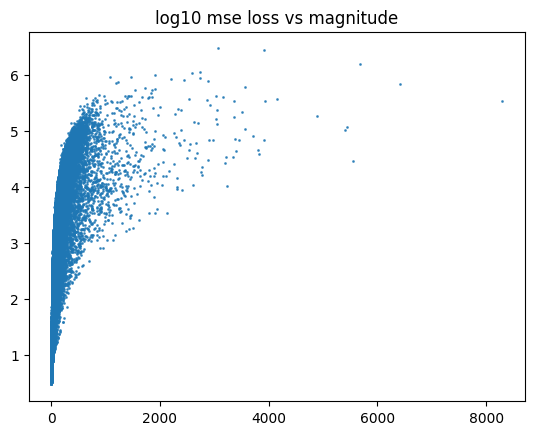

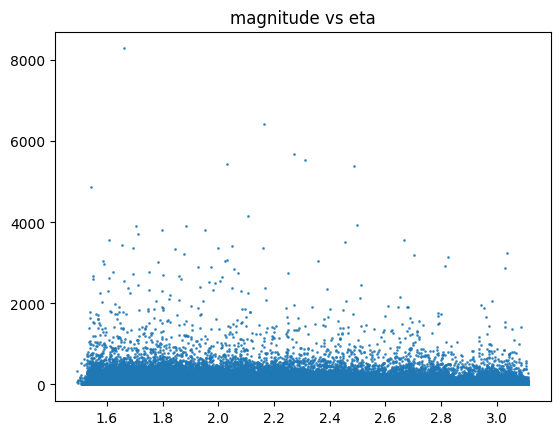

tensor([[ 2.1186e+00, -2.6196e+00,  8.1646e+01,  2.0791e+03,  2.3035e+02],
        [ 2.2124e+00, -1.3894e+00,  9.9885e+01,  4.2415e+03,  1.8893e+02],
        [ 2.2521e+00, -1.2400e+00,  4.4738e+02,  5.7152e+04,  1.4906e+03],
        ...,
        [ 1.8755e+00, -2.6752e+00,  5.8000e+01,  2.3525e+02,  5.5029e+01],
        [ 1.8020e+00, -2.5764e-01,  2.5495e+01,  9.5297e+01,  3.8055e+01],
        [ 1.9963e+00, -2.0914e+00,  1.6000e+01,  1.3591e+01,  1.9510e+01]],
       grad_fn=<CatBackward0>)

In [55]:
# fine-tune autoencoder
# batch 500


# model_5 = Naive_DAE([48,250,100,16])

optimizer = optim.Adam(model_5.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    break
    losses = []
    
    for i, data_list in enumerate(train_dl_flat):
        model_5.train()
        data = data_list[0]
        train_sims = data[:,-4]
        dt_energy = data[:,0:48]
        v_pred = model_5(dt_energy)
        
        batch_loss = loss(dt_energy, v_pred,train_sims) # difference between actual and reconstructed   
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = test
    model_5.eval()
    test_pred = model_5(data_test)
    batch_test = loss(data_test, test_pred,test_sims)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_5.eval()
AE_Stats.generate_stats_no_percent(model_5(test),test,test_loc)
